## Chi-Square Test- 

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.


Q) Whether there is association with sex and smoking?

In [57]:
import scipy.stats as stats

In [58]:
import seaborn as sns
import pandas as pd
import numpy as np
dataset=sns.load_dataset('tips')

In [59]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [60]:
dataset_table=pd.crosstab(dataset['smoker'],dataset['day'])
print(dataset_table)

day     Thur  Fri  Sat  Sun
smoker                     
Yes       17   15   42   19
No        45    4   45   57


In [61]:
dataset_table.values 

array([[17, 15, 42, 19],
       [45,  4, 45, 57]])

In [62]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[17 15 42 19]
 [45  4 45 57]]


In [63]:
val=stats.chi2_contingency(dataset_table)

In [64]:
val

Chi2ContingencyResult(statistic=25.787216672396262, pvalue=1.0567572499836523e-05, dof=3, expected_freq=array([[23.63114754,  7.24180328, 33.15983607, 28.96721311],
       [38.36885246, 11.75819672, 53.84016393, 47.03278689]]))

In [65]:
Expected_Values=val[3]

In [66]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05 # how much variance needs to be captured? (95% needs to captured)

Degree of Freedom:- 1


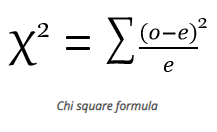

In [67]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [68]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 16.437168667131644


In [69]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 5.028942076756859e-05
Significance level:  0.05
Degree of Freedom:  1
p-value: 5.028942076756859e-05


In [70]:
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
